In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tickers = ['GOOG', 'TSLA', 'META', 'NVDA', 'AAPL', 'EBAY', 'AMZN', 'NFLX', 'MSFT', 'INTC']
start_date = '2024-06-01'
end_date = '2024-07-17'
date_range = pd.date_range(start=start_date, end=end_date)

stock_data = {}
macd_data = {}
stochastic_data = {}
next_day = {}

for stock in tickers:
    stock_data[stock] = yf.download(stock, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
stock_data['TSLA']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-03,178.130005,182.639999,174.490005,176.289993,176.289993,68568900
2024-06-04,174.779999,177.759995,174.000000,174.770004,174.770004,60056300
2024-06-05,175.350006,176.149994,172.130005,175.000000,175.000000,57953800
2024-06-06,174.600006,179.729996,172.729996,177.940002,177.940002,69887000
2024-06-07,176.130005,179.350006,175.580002,177.479996,177.479996,56244900
2024-06-10,176.059998,178.570007,173.169998,173.789993,173.789993,50869700
2024-06-11,173.919998,174.750000,167.410004,170.660004,170.660004,64761900
2024-06-12,171.119995,180.550003,169.800003,177.289993,177.289993,90389400
2024-06-13,188.389999,191.080002,181.229996,182.470001,182.470001,118984100


In [6]:
ema_12 = {}
ema_26 = {}
ema_9 = {}

fast_d = {}
slow_k = {}
slow_d = {}

for stock in tickers:
  ema_12[stock] = stock_data[stock]['Adj Close'].ewm(span = 12).mean()
  ema_26[stock] = stock_data[stock]['Adj Close'].ewm(span = 26).mean()
  macd_data[stock] = ema_12[stock] - ema_26[stock]

  low_value = (stock_data[stock]['Adj Close']).min()
  high_value = stock_data[stock]['Adj Close'].max()
  stochastic_data[stock] = ((stock_data[stock]['Adj Close'] - low_value) / (high_value-low_value)) * 100 #stochastic line    
  fast_d[stock] = stochastic_data[stock].rolling(3).mean()
  slow_k[stock] = fast_d[stock]
  slow_d[stock] = slow_k[stock].rolling(3).mean()

  next_day[stock] = stock_data[stock]['Adj Close'].shift(-1) - stock_data[stock]['Adj Close']

GOOG


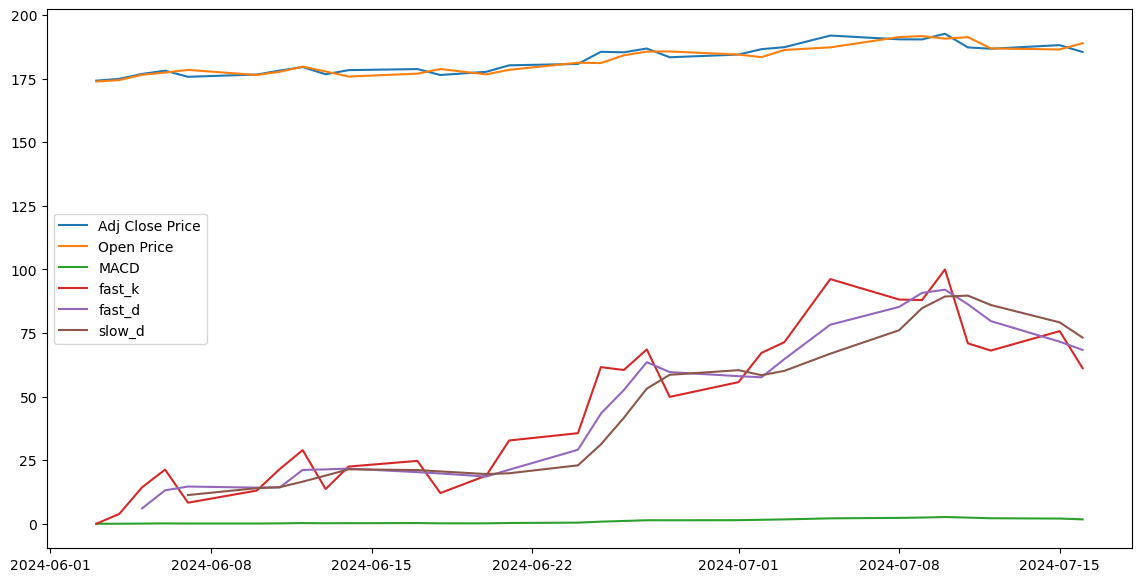

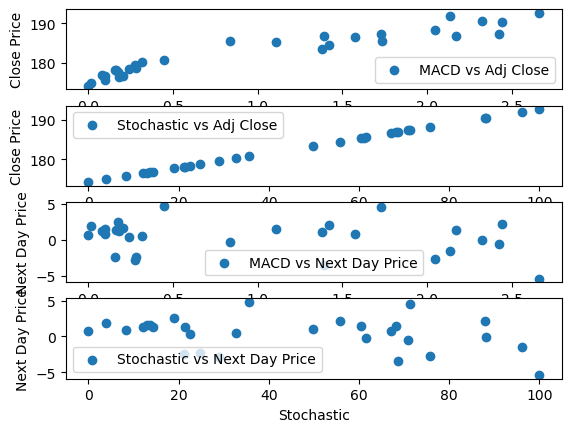

TSLA


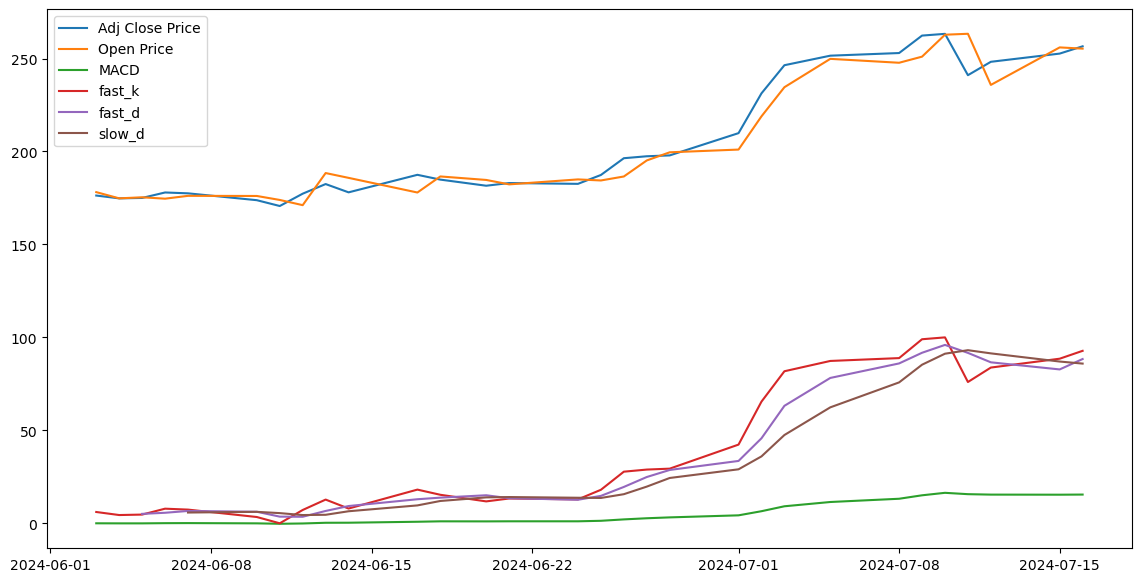

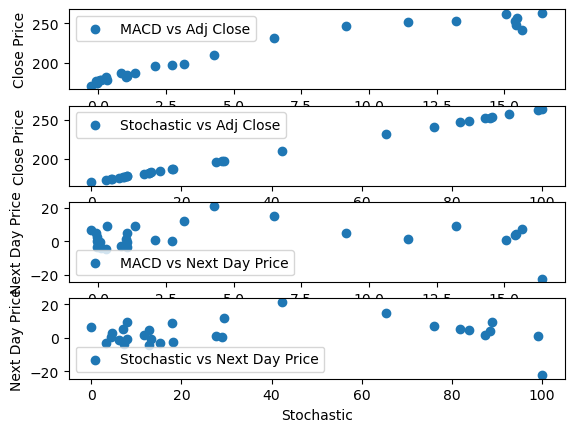

META


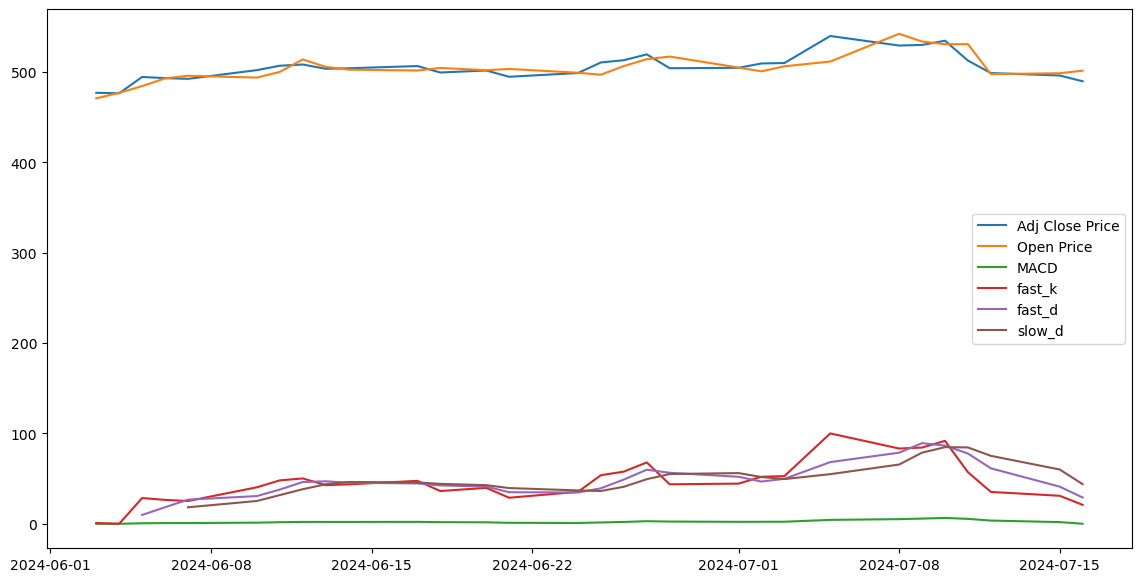

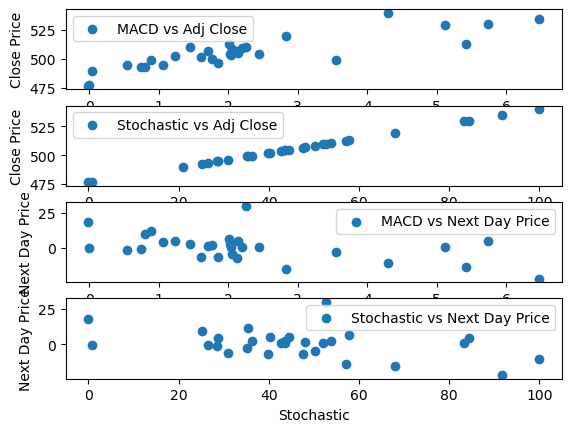

NVDA


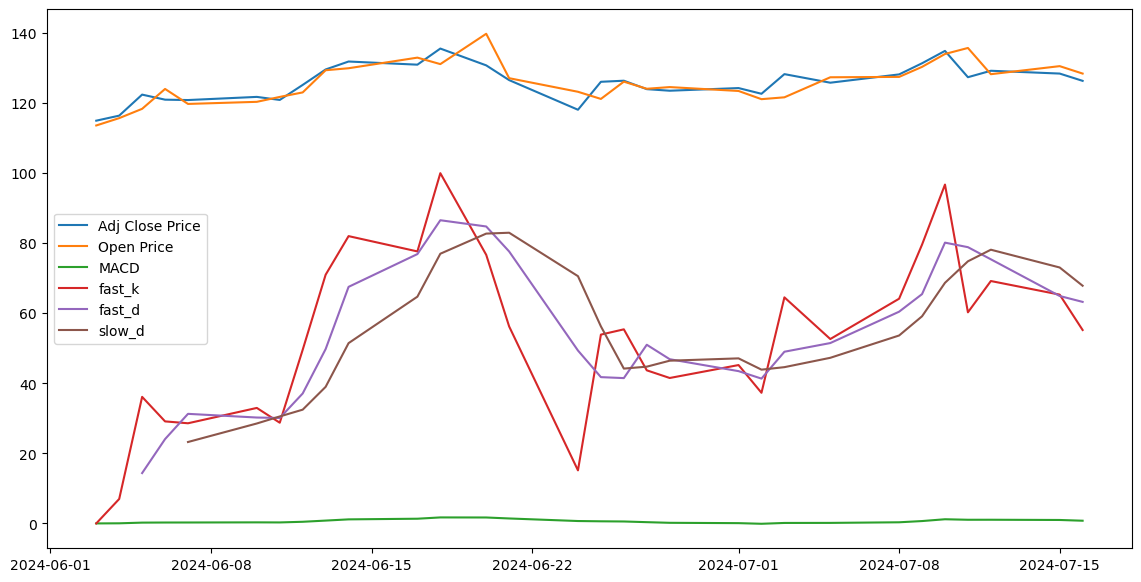

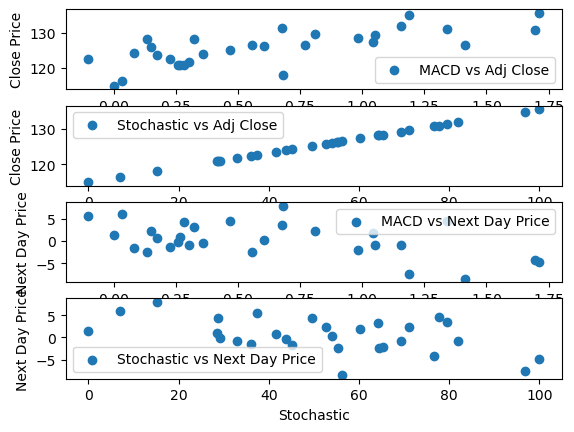

AAPL


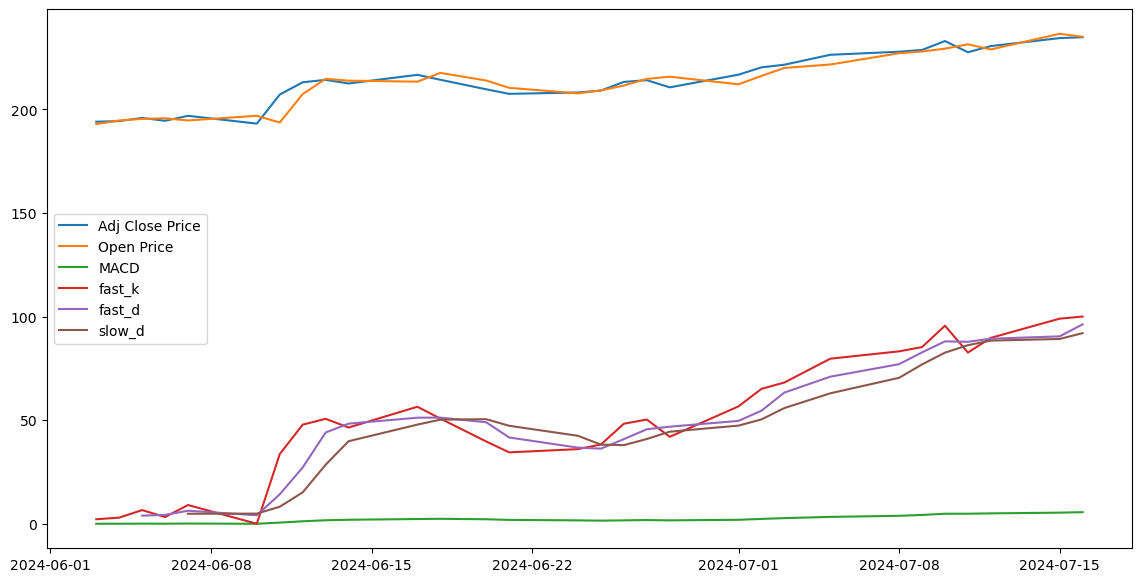

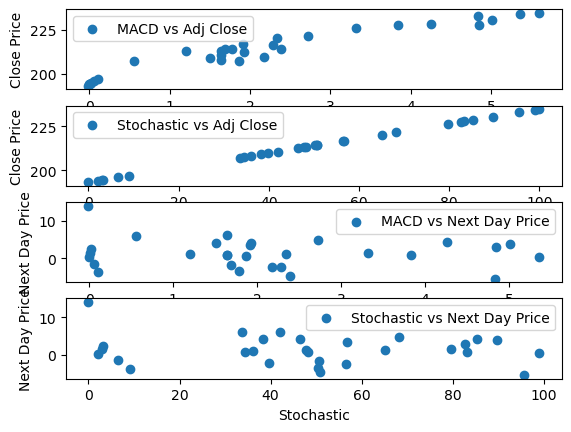

EBAY


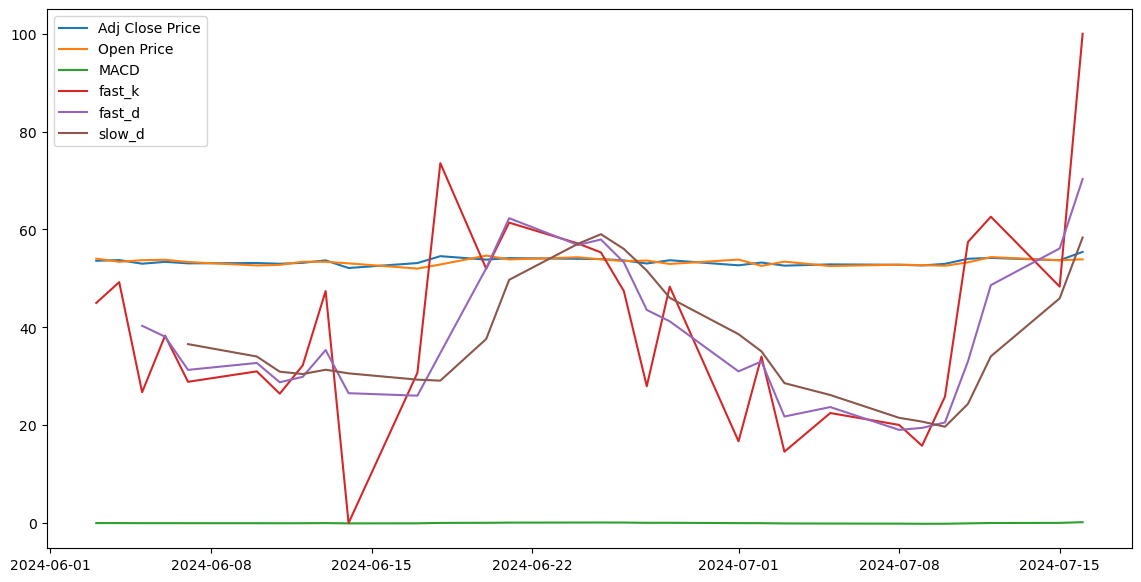

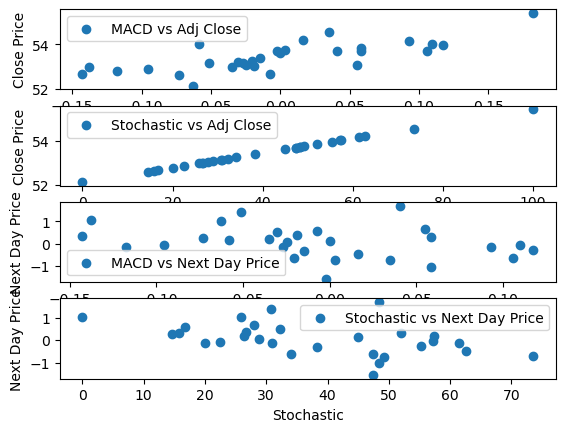

AMZN


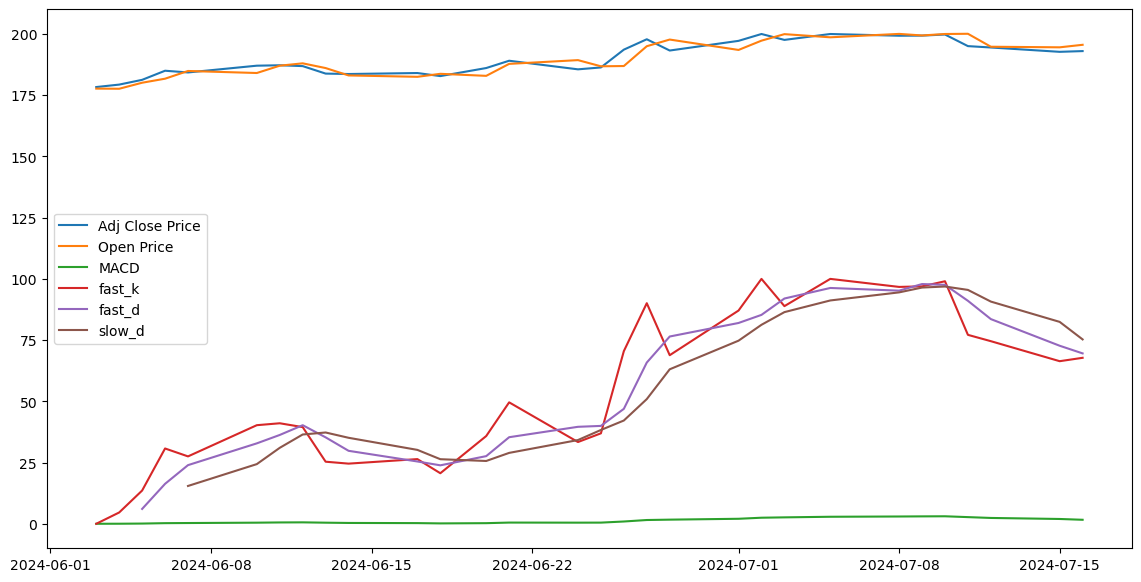

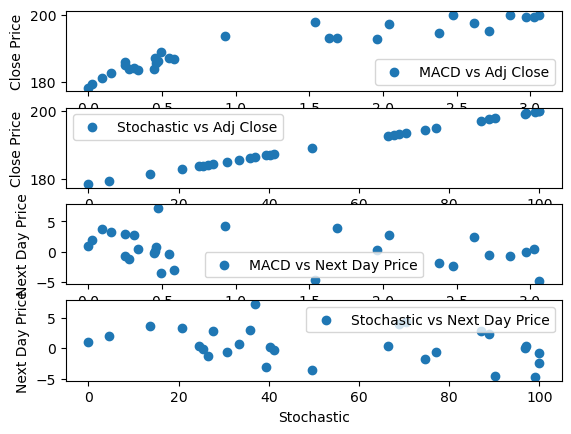

NFLX


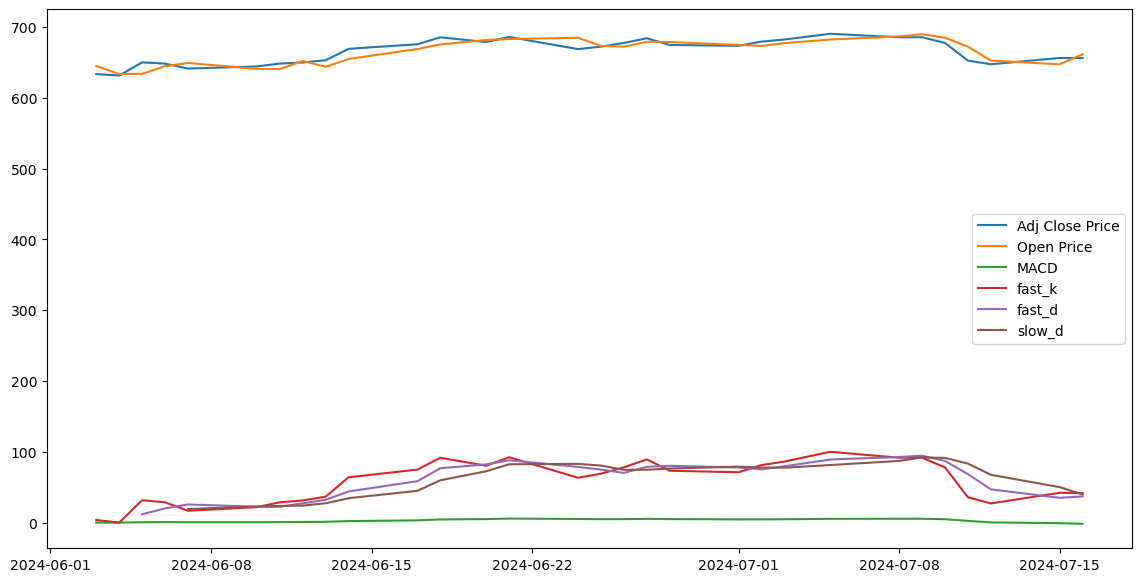

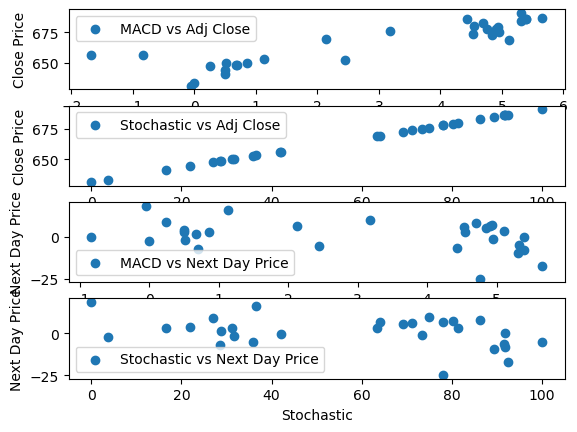

MSFT


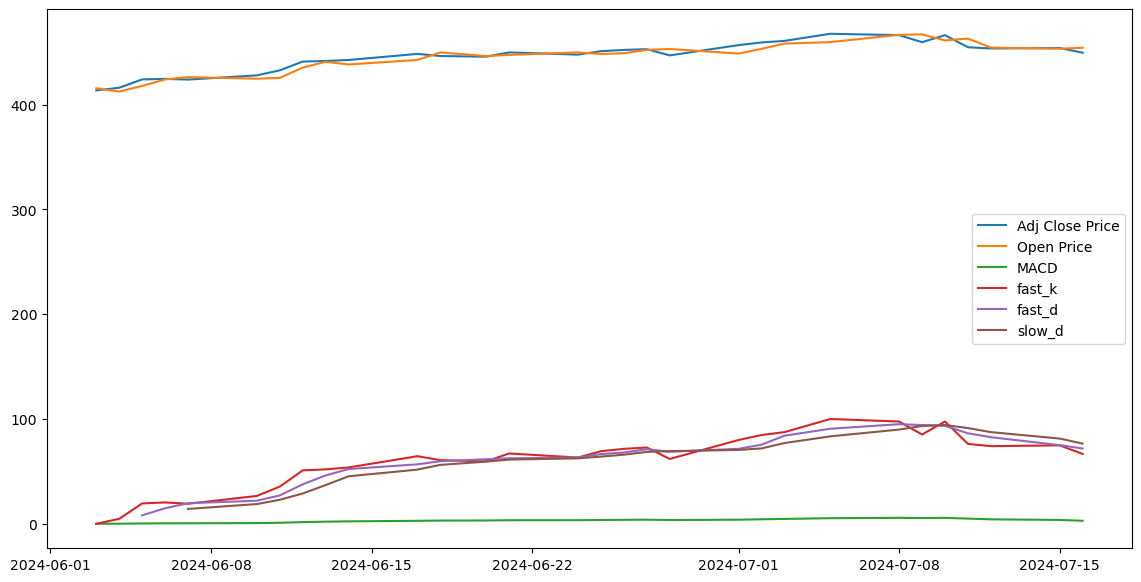

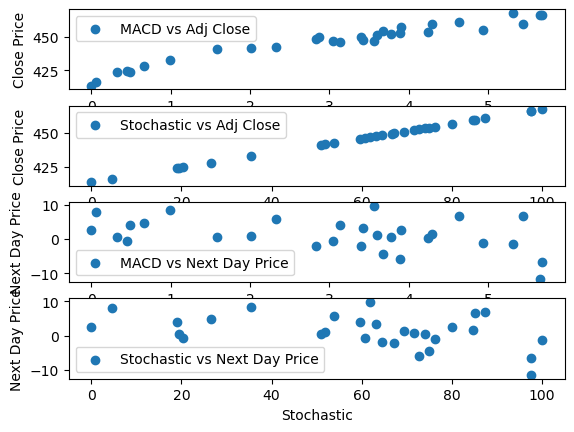

INTC


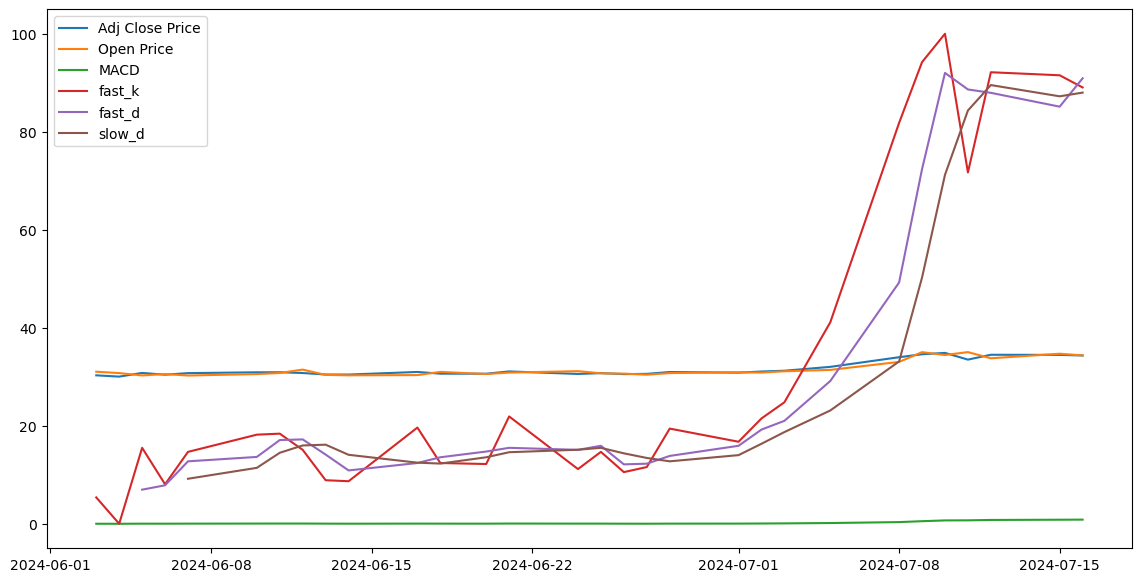

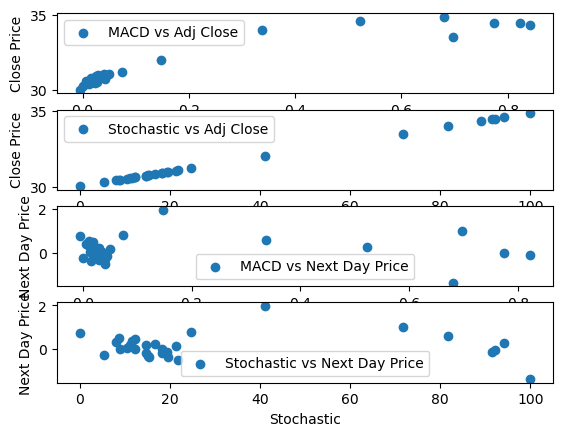

In [7]:
for stock in tickers:
    print(stock)
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data[stock]['Adj Close'], label='Adj Close Price')
    plt.plot(stock_data[stock]['Open'], label='Open Price')
    plt.plot(macd_data[stock], label = 'MACD')
    plt.plot(stochastic_data[stock], label = 'fast_k')
    plt.plot(fast_d[stock], label = 'fast_d')
    plt.plot(slow_d[stock], label = 'slow_d')
    plt.legend()
    plt.show()
    
    plt.subplot(4, 1, 1)
    plt.scatter(macd_data[stock], stock_data[stock]['Adj Close'], label='MACD vs Adj Close')
    plt.xlabel('MACD')
    plt.ylabel('Close Price')
    plt.legend()

    plt.subplot(4, 1, 2)
    plt.scatter(stochastic_data[stock], stock_data[stock]['Adj Close'], label='Stochastic vs Adj Close')
    plt.xlabel('Stochastic')
    plt.ylabel('Close Price')
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.scatter(macd_data[stock], next_day[stock], label='MACD vs Next Day Price')
    plt.xlabel('MACD')
    plt.ylabel('Next Day Price')
    plt.legend()

    plt.subplot(4, 1, 4)
    plt.scatter(stochastic_data[stock], next_day[stock], label='Stochastic vs Next Day Price')
    plt.xlabel('Stochastic')
    plt.ylabel('Next Day Price')
    plt.legend()

    plt.show()
